## Data Preprocessing
The purpose of this notebook is to demo the data preprocessing flow to preprocess signal traces from the STEAD seismic signal dataset for use in CNN model training. See `data_preprocessing` module for more.

### Environment setup

In [16]:
import os
import sys
sys.path.append('../')

from PIL import Image

from earthquake_detection.data_preprocessing import DataPreprocessing

### Get paths to saved dataset files

In [2]:
# Get data directory path to the locally saved STEAD dataset files from saved environment variable
data_dir_path = os.environ.get('STEAD_DATA_DIR_PATH', 'key does not exist')

### Data preprocessing

In [3]:
# Initialize DataPreprocessing object
preproc = DataPreprocessing(data_dir_path)

In [4]:
# Data preprocessing
raw_signals, imgs, metadata = preproc.preprocess(subsample_n=5000)

Data preprocessing for subsample of signal data of size 5000
Fetching data paths from directory
Parsing metadata from csv files


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.45s/it]


Number of total traces: 1265657
Number of earthquake traces: 1030231
Number of noise traces: 235426
Fetching subsample of traces from hdf5 files
Parsing traces from file at path # 0/6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 4834.58it/s]


Parsing traces from file at path # 1/6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 4278.91it/s]


Parsing traces from file at path # 2/6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 5129.92it/s]


Parsing traces from file at path # 3/6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 4665.10it/s]


Parsing traces from file at path # 4/6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 4099.50it/s]


Parsing traces from file at path # 5/6


 28%|████████████████████████████████▏                                                                                | 1422/5000 [00:35<01:18, 45.84it/s]/opt/miniconda3/lib/python3.12/site-packages/matplotlib/axes/_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [02:04<00:00, 40.13it/s]


### Results

In [11]:
len(raw_signals)

5000

In [12]:
len (imgs)

5000

In [13]:
metadata

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name,chunk
263006,AZ,KNW,HH,33.714100,-116.711900,1507.0,600.0,manual,0.62,10.970,...,NaN,0.59070,65.69,350.00,[15.60000038 8.89999962 18.79999924],[[2412.]],2017-05-04 07:44:11.530000,earthquake_local,KNW.AZ_20170504074410_EV,2
984066,N4,V53A,HH,35.669400,-82.812400,681.0,900.0,manual,0.69,8.590,...,NaN,0.47460,52.78,240.00,[24.29999924 26.10000038 23.89999962],[[3199.]],51:16.0,earthquake_local,V53A.N4_20161029235114_EV,5
538500,NC,GDXB,HH,38.807968,-122.795303,939.0,400.0,manual,0.62,1.620,...,NaN,0.06847,7.58,291.30,[50.20000076 50.5 48.20000076],[[1002.]],2014-08-04 10:50:23.990000,earthquake_local,GDXB.NC_20140804105022_EV,3
1211205,NC,LDL,HN,41.381360,-122.293690,1705.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-11 06:42:00,noise,LDL.NC_201802110642_NO,6
310610,AK,MCK,BH,63.731800,-148.937300,618.0,801.2,autopicker,0.86,15.607,...,NaN,0.81500,90.91,104.73,[35.59999847 23.60000038 14.69999981],[[3199.]],2017-12-29 04:01:11.428000,earthquake_local,MCK.AK_20171229040110_EV,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912843,AK,SKN,BH,61.980000,-151.531700,581.0,496.2,autopicker,0.85,10.935,...,NaN,0.35600,39.68,64.31,[21.70000076 24. 21.70000076],[[2487.]],27:51.9,earthquake_local,SKN.AK_20161221032750_EV,5
918147,AK,SLK,BH,60.511700,-150.223100,655.0,697.2,autopicker,0.87,9.667,...,NaN,0.40200,44.83,306.58,[22.10000038 19. 26.10000038],[[2196.]],14:29.4,earthquake_local,SLK.AK_20171010201428_EV,5
806047,AK,PAX,BH,62.969900,-145.469900,1150.0,402.2,autopicker,0.91,6.137,...,NaN,0.31800,35.49,23.96,[40.70000076 11.5 21.79999924],[[2722.]],12:10.2,earthquake_local,PAX.AK_20161220081209_EV,5
391341,TA,P18K,BH,59.392200,-155.229200,680.0,900.0,automatic,0.92,25.673,...,NaN,1.28500,142.64,52.04,[18.60000038 22.20000076 21.29999924],[[5999.]],2017-09-08 20:26:59.900000,earthquake_local,P18K.TA_20170908202659_EV,2


#### Example images created through preprocessing

------------------ 
 Example image 0 
------------------


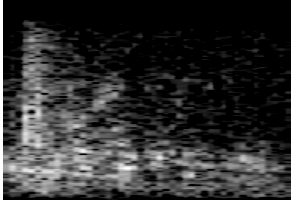

network_code                                                           AZ
receiver_code                                                         KNW
receiver_type                                                          HH
receiver_latitude                                                 33.7141
receiver_longitude                                              -116.7119
receiver_elevation_m                                               1507.0
p_arrival_sample                                                    600.0
p_status                                                           manual
p_weight                                                             0.62
p_travel_sec                                                        10.97
s_arrival_sample                                                   1390.0
s_status                                                           manual
s_weight                                                             0.56
source_id                             

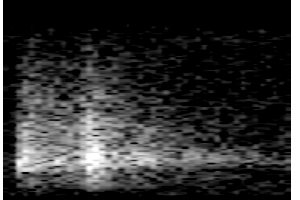

network_code                                                           N4
receiver_code                                                        V53A
receiver_type                                                          HH
receiver_latitude                                                 35.6694
receiver_longitude                                               -82.8124
receiver_elevation_m                                                681.0
p_arrival_sample                                                    900.0
p_status                                                           manual
p_weight                                                             0.69
p_travel_sec                                                         8.59
s_arrival_sample                                                   1520.0
s_status                                                           manual
s_weight                                                             0.69
source_id                             

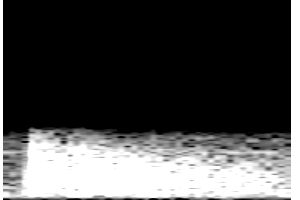

network_code                                                           NC
receiver_code                                                        GDXB
receiver_type                                                          HH
receiver_latitude                                               38.807968
receiver_longitude                                            -122.795303
receiver_elevation_m                                                939.0
p_arrival_sample                                                    400.0
p_status                                                           manual
p_weight                                                             0.62
p_travel_sec                                                         1.62
s_arrival_sample                                                    521.0
s_status                                                       autopicker
s_weight                                                              0.6
source_id                             

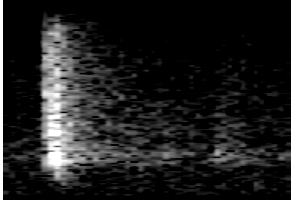

network_code                                            NC
receiver_code                                          LDL
receiver_type                                           HN
receiver_latitude                                 41.38136
receiver_longitude                              -122.29369
receiver_elevation_m                                1705.0
p_arrival_sample                                       NaN
p_status                                               NaN
p_weight                                               NaN
p_travel_sec                                           NaN
s_arrival_sample                                       NaN
s_status                                               NaN
s_weight                                               NaN
source_id                                              NaN
source_origin_time                                     NaN
source_origin_uncertainty_sec                          NaN
source_latitude                                        N

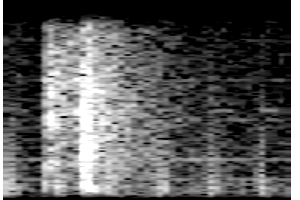

network_code                                                           AK
receiver_code                                                         MCK
receiver_type                                                          BH
receiver_latitude                                                 63.7318
receiver_longitude                                              -148.9373
receiver_elevation_m                                                618.0
p_arrival_sample                                                    801.2
p_status                                                       autopicker
p_weight                                                             0.86
p_travel_sec                                                       15.607
s_arrival_sample                                                   1859.2
s_status                                                       autopicker
s_weight                                                             0.44
source_id                             

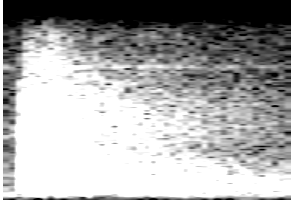

network_code                                                           PB
receiver_code                                                        B087
receiver_type                                                          EH
receiver_latitude                                                 33.4955
receiver_longitude                                            -116.602667
receiver_elevation_m                                               1139.0
p_arrival_sample                                                    500.0
p_status                                                           manual
p_weight                                                             0.58
p_travel_sec                                                         3.08
s_arrival_sample                                                    724.0
s_status                                                           manual
s_weight                                                             0.58
source_id                             

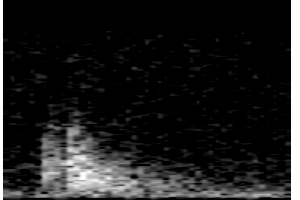

network_code                                                           AZ
receiver_code                                                         CRY
receiver_type                                                          HH
receiver_latitude                                                 33.5654
receiver_longitude                                              -116.7373
receiver_elevation_m                                               1128.0
p_arrival_sample                                                    388.0
p_status                                                       autopicker
p_weight                                                             0.91
p_travel_sec                                                         5.49
s_arrival_sample                                                    783.0
s_status                                                       autopicker
s_weight                                                             0.81
source_id                             

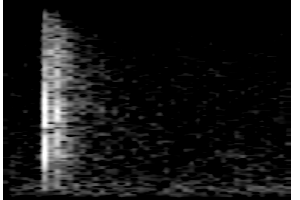

network_code                                                           UW
receiver_code                                                         GBB
receiver_type                                                          EH
receiver_latitude                                               46.608688
receiver_longitude                                            -119.628983
receiver_elevation_m                                                185.0
p_arrival_sample                                                    900.0
p_status                                                           manual
p_weight                                                             0.91
p_travel_sec                                                         2.59
s_arrival_sample                                                   1170.0
s_status                                                           manual
s_weight                                                             0.95
source_id                             

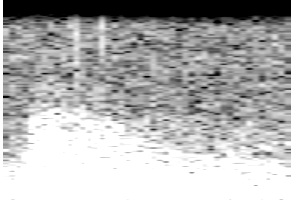

network_code                                                           AK
receiver_code                                                        CHUM
receiver_type                                                          BH
receiver_latitude                                                 63.8827
receiver_longitude                                              -152.3152
receiver_elevation_m                                                217.0
p_arrival_sample                                                    700.0
p_status                                                           manual
p_weight                                                             0.74
p_travel_sec                                                        17.52
s_arrival_sample                                                   1824.1
s_status                                                           manual
s_weight                                                             0.82
source_id                             

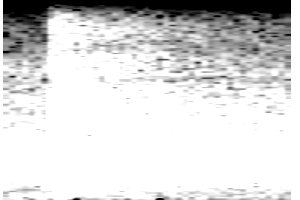

network_code                                                        PB
receiver_code                                                     B087
receiver_type                                                       HH
receiver_latitude                                              33.4955
receiver_longitude                                         -116.602667
receiver_elevation_m                                            1139.0
p_arrival_sample                                                 700.0
p_status                                                        manual
p_weight                                                          0.62
p_travel_sec                                                       4.3
s_arrival_sample                                                1005.0
s_status                                                        manual
s_weight                                                          0.56
source_id                                                   ci37338159
source

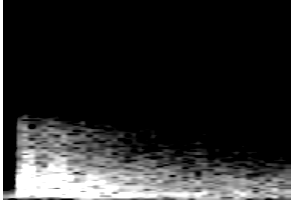

network_code                                            GO
receiver_code                                          AKH
receiver_type                                           HH
receiver_latitude                                    41.41
receiver_longitude                                 43.4929
receiver_elevation_m                                1720.0
p_arrival_sample                                       NaN
p_status                                               NaN
p_weight                                               NaN
p_travel_sec                                           NaN
s_arrival_sample                                       NaN
s_status                                               NaN
s_weight                                               NaN
source_id                                              NaN
source_origin_time                                     NaN
source_origin_uncertainty_sec                          NaN
source_latitude                                        N

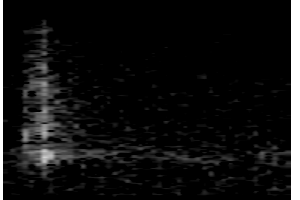

network_code                                                           PB
receiver_code                                                        B084
receiver_type                                                          EH
receiver_latitude                                                33.61157
receiver_longitude                                             -116.45637
receiver_elevation_m                                               1271.0
p_arrival_sample                                                    400.0
p_status                                                           manual
p_weight                                                             0.52
p_travel_sec                                                    17.879999
s_arrival_sample                                                   1676.0
s_status                                                           manual
s_weight                                                             0.52
source_id                             

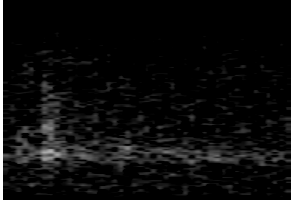

network_code                                              SC
receiver_code                                            PDB
receiver_type                                             HH
receiver_latitude                                    32.0722
receiver_longitude                                -103.59662
receiver_elevation_m                                  1025.0
p_arrival_sample                                         NaN
p_status                                                 NaN
p_weight                                                 NaN
p_travel_sec                                             NaN
s_arrival_sample                                         NaN
s_status                                                 NaN
s_weight                                                 NaN
source_id                                                NaN
source_origin_time                                       NaN
source_origin_uncertainty_sec                            NaN
source_latitude         

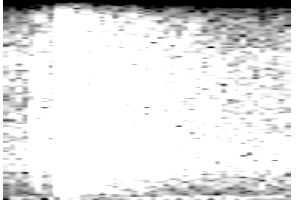

network_code                                             TA
receiver_code                                          M02C
receiver_type                                            HH
receiver_latitude                                    41.392
receiver_longitude                                -122.8538
receiver_elevation_m                                  960.0
p_arrival_sample                                        NaN
p_status                                                NaN
p_weight                                                NaN
p_travel_sec                                            NaN
s_arrival_sample                                        NaN
s_status                                                NaN
s_weight                                                NaN
source_id                                               NaN
source_origin_time                                      NaN
source_origin_uncertainty_sec                           NaN
source_latitude                         

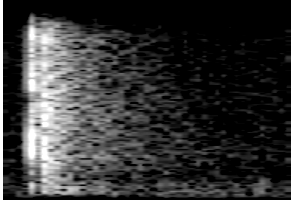

network_code                                                           AK
receiver_code                                                         TRF
receiver_type                                                          BH
receiver_latitude                                                 63.4502
receiver_longitude                                              -150.2893
receiver_elevation_m                                               1711.9
p_arrival_sample                                                    407.0
p_status                                                       autopicker
p_weight                                                             0.93
p_travel_sec                                                        5.503
s_arrival_sample                                                    803.0
s_status                                                       autopicker
s_weight                                                             0.85
source_id                             

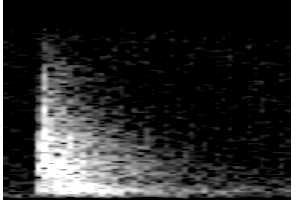

network_code                                                           AZ
receiver_code                                                         FRD
receiver_type                                                          HH
receiver_latitude                                                 33.4947
receiver_longitude                                              -116.6022
receiver_elevation_m                                               1164.0
p_arrival_sample                                                    900.0
p_status                                                           manual
p_weight                                                             0.66
p_travel_sec                                                         5.72
s_arrival_sample                                                   1312.0
s_status                                                           manual
s_weight                                                             0.58
source_id                             

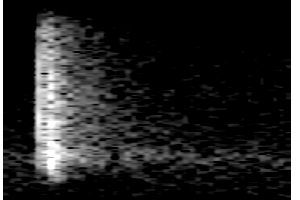

network_code                                                           AK
receiver_code                                                         FID
receiver_type                                                          BH
receiver_latitude                                                 60.7277
receiver_longitude                                              -146.5987
receiver_elevation_m                                                500.0
p_arrival_sample                                                    899.2
p_status                                                       autopicker
p_weight                                                             0.92
p_travel_sec                                                       11.208
s_arrival_sample                                                   1764.2
s_status                                                       autopicker
s_weight                                                             0.62
source_id                             

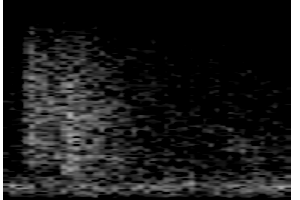

network_code                                                           PR
receiver_code                                                         LSP
receiver_type                                                          EH
receiver_latitude                                               18.175739
receiver_longitude                                             -67.085816
receiver_elevation_m                                                389.8
p_arrival_sample                                                    600.0
p_status                                                           manual
p_weight                                                             0.98
p_travel_sec                                                        28.27
s_arrival_sample                                                   2545.0
s_status                                                           manual
s_weight                                                             0.53
source_id                             

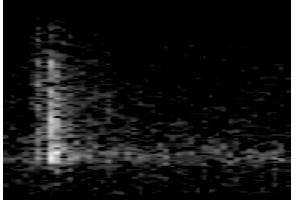

network_code                                                           PR
receiver_code                                                        STVI
receiver_type                                                          BH
receiver_latitude                                               18.353333
receiver_longitude                                             -64.962222
receiver_elevation_m                                                377.0
p_arrival_sample                                                    600.0
p_status                                                           manual
p_weight                                                             0.35
p_travel_sec                                                        15.56
s_arrival_sample                                                   1730.0
s_status                                                           manual
s_weight                                                             0.74
source_id                             

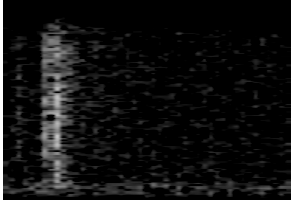

network_code                                                           AK
receiver_code                                                        WAT6
receiver_type                                                          BH
receiver_latitude                                                 62.5808
receiver_longitude                                                -147.74
receiver_elevation_m                                               1681.0
p_arrival_sample                                                    599.2
p_status                                                       autopicker
p_weight                                                             0.84
p_travel_sec                                                       13.466
s_arrival_sample                                                   1487.2
s_status                                                       autopicker
s_weight                                                             0.73
source_id                             

In [31]:
for i in range(0,20):
    print(f'------------------ \n Example image {i} \n------------------')
    im = Image.fromarray(imgs[i])
    display(im)
    print(metadata.iloc[i])